In [2]:
import requests
import base64
import json
from datetime import datetime, timedelta

# Replace these with your own credentials
client_id = '6de8a27421474b9180b4c22b6027b034'
client_secret = '01024a70b1f2428284b7767a6152602a'

# Function to get the access token
def get_access_token(client_id, client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_header = base64.b64encode(f'{client_id}:{client_secret}'.encode('utf-8')).decode('utf-8')
    headers = {'Authorization': f'Basic {auth_header}'}
    data = {'grant_type': 'client_credentials'}

    response = requests.post(auth_url, headers=headers, data=data)
    if response.status_code == 200:
        return response.json()['access_token']
    else:
        raise Exception(f'Failed to get access token. Status code: {response.status_code}')

# Function to get the most played song genres from 5 years ago
def get_most_played_genres(access_token):
    api_url = 'https://api.spotify.com/v1/browse/categories'
    headers = {'Authorization': f'Bearer {access_token}'}
    five_years_ago = datetime.now() - timedelta(days=5*365)
    params = {'time_range': 'long_term', 'limit': 10, 'offset': 0, 'country': 'US'}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        categories = response.json()['categories']['items']
        most_played_genres = [category['name'] for category in categories]
        return most_played_genres
    else:
        raise Exception(f'Failed to get most played song genres. Status code: {response.status_code}')

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)
    most_played_genres = get_most_played_genres(access_token)
    print("Most played song genres from 5 years ago:")
    for genre in most_played_genres:
        print(f"- {genre}")


Most played song genres from 5 years ago:
- Top Lists
- Hip-Hop
- Pop
- Country
- Latin
- Rock
- Summer
- Workout
- R&B
- Dance/Electronic


In [3]:

# Function to get the access token
def get_access_token(client_id, client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_header = base64.b64encode(f'{client_id}:{client_secret}'.encode('utf-8')).decode('utf-8')
    headers = {'Authorization': f'Basic {auth_header}'}
    data = {'grant_type': 'client_credentials'}

    response = requests.post(auth_url, headers=headers, data=data)
    if response.status_code == 200:
        return response.json()['access_token']
    else:
        raise Exception(f'Failed to get access token. Status code: {response.status_code}')
# Function to search for artists
def search_artists(access_token, query, limit=50):
    api_url = 'https://api.spotify.com/v1/search'
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'q': query, 'type': 'artist', 'limit': limit}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        artists = response.json()['artists']['items']
        return artists
    else:
        raise Exception(f'Failed to search for artists. Status code: {response.status_code}')

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)

    # Search for artists 
    artists = search_artists(access_token, 'pop')

    # Get artist names and popularity scores
    artist_popularity = [(artist['name'], artist['popularity']) for artist in artists]

    # Sort artists by popularity and get the top 20
    top_20_artists = sorted(artist_popularity, key=lambda x: x[1], reverse=True)[:20]

    # Print the top 20 artists
    print("Top 20 artists:")
    for idx, (name, popularity) in enumerate(top_20_artists, 1):
        print(f"{idx}. {name} (Popularity: {popularity})")


Top 20 artists:
1. The Weeknd (Popularity: 98)
2. Miley Cyrus (Popularity: 93)
3. Rihanna (Popularity: 93)
4. Ariana Grande (Popularity: 92)
5. Ed Sheeran (Popularity: 92)
6. Harry Styles (Popularity: 91)
7. Sam Smith (Popularity: 89)
8. Lady Gaga (Popularity: 88)
9. Katy Perry (Popularity: 86)
10. Pop Smoke (Popularity: 84)
11. Paramore (Popularity: 82)
12. Fall Out Boy (Popularity: 81)
13. My Chemical Romance (Popularity: 79)
14. All Time Low (Popularity: 73)
15. Popcaan (Popularity: 69)
16. Icona Pop (Popularity: 68)
17. The Wanted (Popularity: 66)
18. Poppy (Popularity: 61)
19. Pop Evil (Popularity: 61)
20. Poppy Baskcomb (Popularity: 60)


In [4]:
# Need to convert the list of tuples to a Pandas DataFrame to be  easier to work with
import pandas as pd

# Create a DataFrame from the top 20 artists list
top_20_artists_df = pd.DataFrame(top_20_artists, columns=['Artist', 'Popularity'])

# Print the DataFrame
print(top_20_artists_df)


                 Artist  Popularity
0            The Weeknd          98
1           Miley Cyrus          93
2               Rihanna          93
3         Ariana Grande          92
4            Ed Sheeran          92
5          Harry Styles          91
6             Sam Smith          89
7             Lady Gaga          88
8            Katy Perry          86
9             Pop Smoke          84
10             Paramore          82
11         Fall Out Boy          81
12  My Chemical Romance          79
13         All Time Low          73
14              Popcaan          69
15            Icona Pop          68
16           The Wanted          66
17                Poppy          61
18             Pop Evil          61
19       Poppy Baskcomb          60


In [5]:
# Wrong, as it extracted the artist id from the first artist in the list, not the first artist in the top 20 list
# Function to get an artist's follower count
def get_artist_follower_count(access_token, artist_id):
    api_url = f'https://api.spotify.com/v1/artists/{artist_id}'
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(api_url, headers=headers)
    if response.status_code == 200:
        return response.json()['followers']['total']
    else:
        raise Exception(f'Failed to get follower count for artist {artist_id}. Status code: {response.status_code}')

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)

    # Get the artist IDs from the original artists list
    artist_ids = [artist['id'] for artist in artists]

    # Get the follower counts for the top 20 artists
    follower_counts = [get_artist_follower_count(access_token, artist_id) for artist_id in artist_ids]

    # Add the "Followers" column to the DataFrame
    top_20_artists_df['Followers'] = follower_counts[:20]

    # Print the updated DataFrame
    print(top_20_artists_df)



                 Artist  Popularity  Followers
0            The Weeknd          98   12226891
1           Miley Cyrus          93     888360
2               Rihanna          93    1231957
3         Ariana Grande          92       5654
4            Ed Sheeran          92     512269
5          Harry Styles          91        257
6             Sam Smith          89       5038
7             Lady Gaga          88      26849
8            Katy Perry          86          4
9             Pop Smoke          84       2864
10             Paramore          82   88917092
11         Fall Out Boy          81        408
12  My Chemical Romance          79      21426
13         All Time Low          73   20140407
14              Popcaan          69        101
15            Icona Pop          68       6380
16           The Wanted          66    7510358
17                Poppy          61         15
18             Pop Evil          61      60353
19       Poppy Baskcomb          60   25943897


^ This is Wrong, as the code extracted the artist id from the first artists in the iteration, not the first artists in the top 20 list, so the followers count did not correspond. Below it's the updated version in which I add a Followers column to the popularity dataframe

In [6]:
# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)

    # Create a dictionary to store artist IDs and their corresponding names, popularity scores, and follower counts
    artist_id_map = {artist['id']: (artist['name'], artist['popularity'], artist['followers']['total']) for artist in artists}

    # Sort the dictionary by popularity and select the top 20 artists
    sorted_artist_id_map = dict(sorted(artist_id_map.items(), key=lambda item: item[1][1], reverse=True)[:20])

    # Create a new DataFrame with the updated data
    updated_top_20_artists_df = pd.DataFrame(sorted_artist_id_map.values(), columns=['Artist', 'Popularity', 'Followers'])

    # Print the updated DataFrame
    print(updated_top_20_artists_df)


                 Artist  Popularity  Followers
0            The Weeknd          98   61407159
1           Miley Cyrus          93   20140407
2               Rihanna          93   53928858
3         Ariana Grande          92   88917092
4            Ed Sheeran          92  110663355
5          Harry Styles          91   26710666
6             Sam Smith          89   22140331
7             Lady Gaga          88   25701963
8            Katy Perry          86   25943897
9             Pop Smoke          84   12226891
10             Paramore          82    7648694
11         Fall Out Boy          81    9893880
12  My Chemical Romance          79    7510358
13         All Time Low          73    2915998
14              Popcaan          69     888360
15            Icona Pop          68     695787
16           The Wanted          66    2605871
17                Poppy          61    1231957
18             Pop Evil          61     512269
19       Poppy Baskcomb          60       2864


In [7]:
# Got rid of 2 weird outliers
updated_top_20_artists_df = updated_top_20_artists_df[:-2]
updated_top_20_artists_df

,Artist,Popularity,Followers
0,The Weeknd,98,61407159
1,Miley Cyrus,93,20140407
2,Rihanna,93,53928858
3,Ariana Grande,92,88917092
4,Ed Sheeran,92,110663355
5,Harry Styles,91,26710666
6,Sam Smith,89,22140331
7,Lady Gaga,88,25701963
8,Katy Perry,86,25943897
9,Pop Smoke,84,12226891


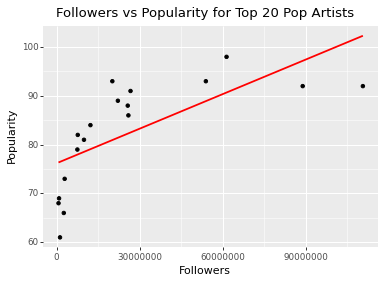

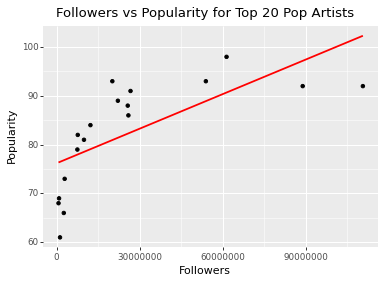

In [8]:
import pandas as pd
import  numpy as np
np.float=float
np.int=int
np.object=object
np.bool=bool
from plotnine import ggplot, aes, geom_point, geom_smooth, labs

# Create a scatter plot using the DataFrame columns
plot = (
    ggplot(updated_top_20_artists_df, aes(x='Followers', y='Popularity'))
    + geom_point()
    + geom_smooth(method='lm', color='red', se=False)
    + labs(x='Followers', y='Popularity', title='Followers vs Popularity for Top 20 Pop Artists')
)

# Display the plot
plot.draw()


In [9]:
# Create a dictionary to store artist IDs and their corresponding names, popularity scores, and follower counts
artist_id_map = {artist['id']: (artist['name'], artist['popularity'], artist['followers']['total']) for artist in artists}

# Sort the dictionary by popularity and select the top 20 artists
sorted_artist_id_map = dict(sorted(artist_id_map.items(), key=lambda item: item[1][1], reverse=True)[:20])

# Create a new DataFrame with the updated data
updated_top_20_artists_df = pd.DataFrame(sorted_artist_id_map.values(), columns=['Artist', 'Popularity', 'Followers'])

# Add the 'Artist_ID' column to the DataFrame
updated_top_20_artists_df['Artist_ID'] = sorted_artist_id_map.keys()
updated_top_20_artists_df


,Artist,Popularity,Followers,Artist_ID
0,The Weeknd,98,61407159,1Xyo4u8uXC1ZmMpatF05PJ
1,Miley Cyrus,93,20140407,5YGY8feqx7naU7z4HrwZM6
2,Rihanna,93,53928858,5pKCCKE2ajJHZ9KAiaK11H
3,Ariana Grande,92,88917092,66CXWjxzNUsdJxJ2JdwvnR
4,Ed Sheeran,92,110663355,6eUKZXaKkcviH0Ku9w2n3V
5,Harry Styles,91,26710666,6KImCVD70vtIoJWnq6nGn3
6,Sam Smith,89,22140331,2wY79sveU1sp5g7SokKOiI
7,Lady Gaga,88,25701963,1HY2Jd0NmPuamShAr6KMms
8,Katy Perry,86,25943897,6jJ0s89eD6GaHleKKya26X
9,Pop Smoke,84,12226891,0eDvMgVFoNV3TpwtrVCoTj


In [10]:
# Function to get the top 20 tracks for a given artist
def get_top_tracks(access_token, artist_id):
    if not artist_id:
        return []

    api_url = f'https://api.spotify.com/v1/artists/{artist_id}/top-tracks'
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'country': 'US'}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        tracks = response.json()['tracks']
        top_tracks = [(track['name'], track['popularity']) for track in tracks]
        return top_tracks
    else:
        raise Exception(f'Failed to get top tracks for artist {artist_id}. Status code: {response.status_code}')

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)

    # Create a dictionary to store the top 20 tracks for each artist
    artist_top_tracks = {}

    # Iterate through the artists in the DataFrame
    for _, row in updated_top_20_artists_df.iterrows():
        artist_id = row['Artist_ID']
        artist_name = row['Artist']

        # Get the top 20 tracks for the artist
        try:
            top_tracks = get_top_tracks(access_token, artist_id)
            artist_top_tracks[artist_name] = top_tracks

            # Print the artist's top 20 tracks
            print(f"Top 20 tracks for {artist_name}:")
            for idx, (track_name, popularity) in enumerate(top_tracks, 1):
                print(f"{idx}. {track_name} (Popularity: {popularity})")
            print("\n")

        except Exception as e:
            print(f"Error occurred for artist {artist_name}: {e}")
            continue


Top 20 tracks for The Weeknd:
1. Die For You (with Ariana Grande) - Remix (Popularity: 77)
2. Creepin' (with The Weeknd & 21 Savage) (Popularity: 95)
3. Die For You (Popularity: 89)
4. Starboy (Popularity: 91)
5. Blinding Lights (Popularity: 90)
6. I Was Never There (Popularity: 88)
7. Save Your Tears (Popularity: 88)
8. Call Out My Name (Popularity: 87)
9. Reminder (Popularity: 87)
10. Save Your Tears (Remix) (with Ariana Grande) - Bonus Track (Popularity: 82)


Top 20 tracks for Miley Cyrus:
1. Flowers (Popularity: 86)
2. River (Popularity: 87)
3. Party In The U.S.A. (Popularity: 76)
4. Jaded (Popularity: 83)
5. Nothing Breaks Like a Heart (feat. Miley Cyrus) (Popularity: 77)
6. Prisoner (feat. Dua Lipa) (Popularity: 81)
7. Angels Like You (Popularity: 80)
8. Wrecking Ball (Popularity: 81)
9. Rose Colored Lenses (Popularity: 81)
10. Thousand Miles (feat. Brandi Carlile) (Popularity: 79)


Top 20 tracks for Rihanna:
1. We Found Love (Popularity: 83)
2. Umbrella (Popularity: 72)
3. Lov

In [11]:
# Put the top tracks into a DataFrame
top_tracks_df = pd.DataFrame([(artist, track, popularity) for artist, tracks in artist_top_tracks.items() for track, popularity in tracks], columns=['Artist', 'Track', 'Popularity'])
top_tracks_df


,Artist,Track,Popularity
0,The Weeknd,Die For You (with Ariana Grande) - Remix,77
1,The Weeknd,Creepin' (with The Weeknd & 21 Savage),95
2,The Weeknd,Die For You,89
3,The Weeknd,Starboy,91
4,The Weeknd,Blinding Lights,90
...,...,...,...
195,Poppy Baskcomb,Falling Down,41
196,Poppy Baskcomb,Alive (feat. Poppy Baskcomb),43
197,Poppy Baskcomb,I Need To Feel,39
198,Poppy Baskcomb,Lovefool (feat. Jess Bays),43


^ Got Top 20 tracks for each artist in the Top 20 and put them into another dataframe. 
Below, I clean the data to prepare it to be plotted

In [33]:
# Get rid of the NaN values
top_tracks_df = top_tracks_df.dropna()
# Convert the 'Popularity' column to an integer
top_tracks_df['Popularity'] = top_tracks_df['Popularity'].astype(int)
# Save the DataFrame to a CSV file
top_tracks_df.to_csv('top_tracks.csv', index=False)

In [39]:
# Pinpoint outliers
top_tracks_df[top_tracks_df['Popularity'] < 40]
# Get rid of these outliers
top_tracks_df = top_tracks_df[top_tracks_df['Popularity'] >= 40]
top_tracks_df

,Artist,Track,Popularity
0,The Weeknd,Die For You (with Ariana Grande) - Remix,77
1,The Weeknd,Creepin' (with The Weeknd & 21 Savage),95
2,The Weeknd,Die For You,89
3,The Weeknd,Starboy,91
4,The Weeknd,Blinding Lights,90
...,...,...,...
193,Poppy Baskcomb,Temptation (feat. Poppy Baskcomb),63
194,Poppy Baskcomb,This Love,53
195,Poppy Baskcomb,Falling Down,41
196,Poppy Baskcomb,Alive (feat. Poppy Baskcomb),43


Figure(640x480)


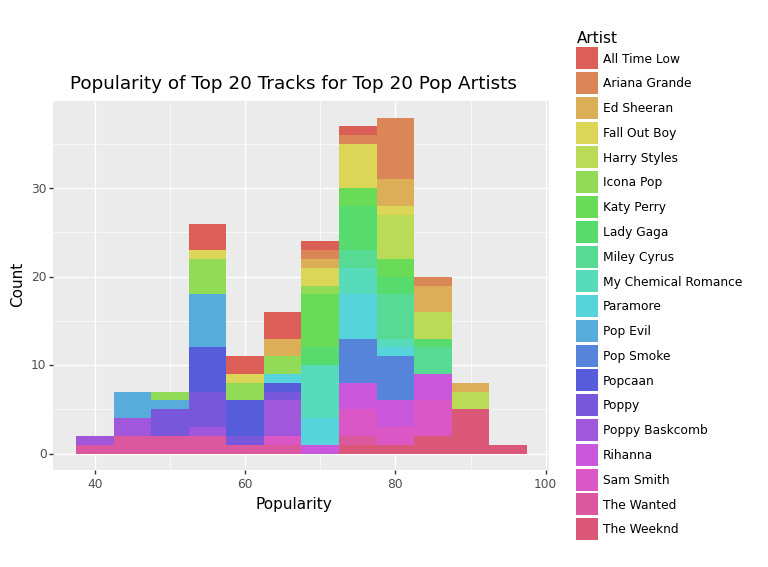

In [40]:
from plotnine import geom_histogram
# Create an appealing plotnine plot to analyze this dataframe
plot = (
    ggplot(top_tracks_df, aes(x='Popularity', fill='Artist'))
    + geom_histogram(binwidth=5)
    + labs(x='Popularity', y='Count', title='Popularity of Top 20 Tracks for Top 20 Pop Artists')
)
print(plot.draw())


Figure(640x480)


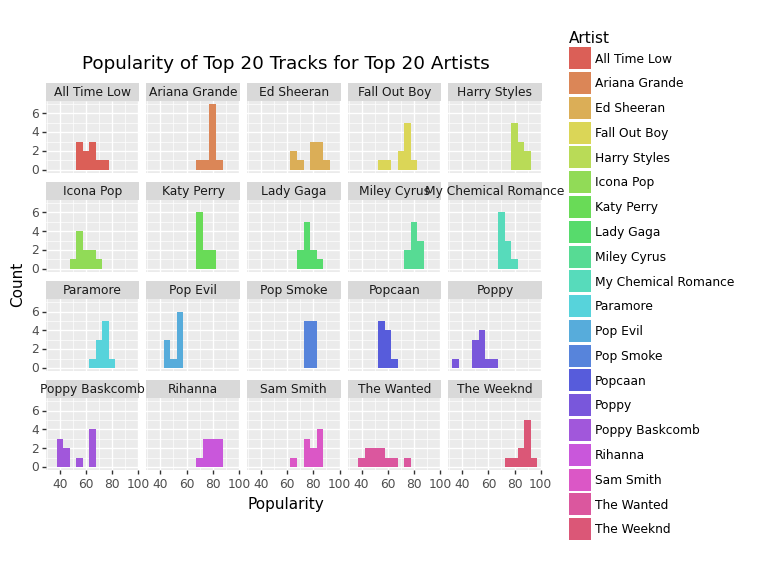

In [27]:
# Here, I'm doing the same thing as above, but I'm using the facet_wrap() function to create a separate histogram for each artist,
# which makes it easier to compare the popularity of each artist's top tracks
from plotnine import facet_wrap
plot = (
    ggplot(top_tracks_df, aes(x='Popularity', fill='Artist'))
    + geom_histogram(binwidth=5)
    + labs(x='Popularity', y='Count', title='Popularity of Top 20 Tracks for Top 20 Artists')
    + facet_wrap('~Artist')
)
print(plot.draw())

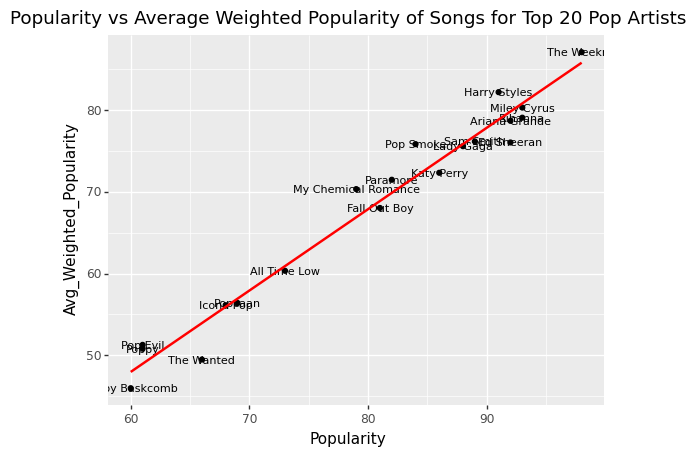

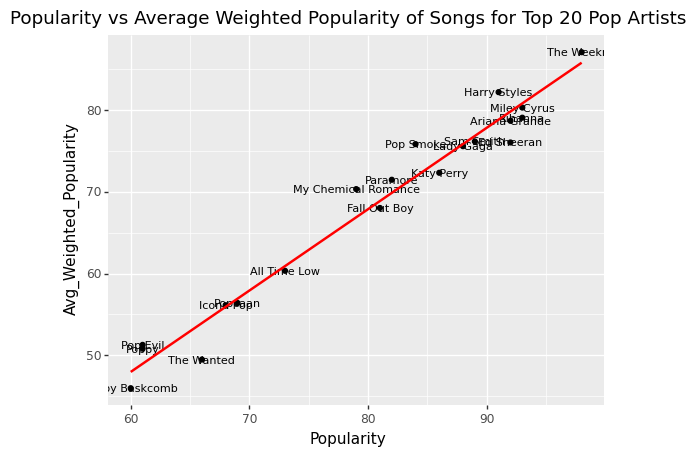

In [47]:
from plotnine import geom_text
# Create a visualisation comparing artist popularity to their songs' average weighted popularity
# Create a dictionary to store the average weighted popularity for each artist
artist_avg_weighted_popularity_songs = {}

# Iterate through the artists in the DataFrame
for _, row in updated_top_20_artists_df.iterrows():
    artist_id = row['Artist_ID']
    artist_name = row['Artist']

    # Get the top 20 tracks for the artist
    try:
        top_tracks = get_top_tracks(access_token, artist_id)
        weighted_popularity = sum([popularity * (idx + 1) for idx, (_, popularity) in enumerate(top_tracks)]) / sum([idx + 1 for idx in range(len(top_tracks))])
        artist_avg_weighted_popularity_songs[artist_name] = weighted_popularity

    except Exception as e:
        print(f"Error occurred for artist {artist_name}: {e}")
        continue

# Create a DataFrame with the average weighted popularity for each artist
avg_weighted_popularity_df = pd.DataFrame(artist_avg_weighted_popularity_songs.items(), columns=['Artist', 'Avg_Weighted_Popularity_Songs'])
avg_weighted_popularity_df


# Merge the DataFrame with the average weighted popularity with the DataFrame with the artist popularity
merged_df = pd.merge(updated_top_20_artists_df, avg_weighted_popularity_df, on='Artist')
merged_df


# Create a scatter plot using the DataFrame columns
plot = (
    ggplot(merged_df, aes(x='Popularity', y='Avg_Weighted_Popularity_Songs'))
    + geom_text(aes(label='Artist'), size=8)
    + geom_point()
    + geom_smooth(method='lm', color='red', se=False)
    + labs(x='Popularity', y='Avg_Weighted_Popularity', title='Popularity vs Average Weighted Popularity of Songs for Top 20 Pop Artists')
)


# Display the plot
plot.draw()

In [ ]:
# Now I am trying to see what artists are viral in given countries
# Function to get the top playlists for a given country
def get_top_playlists(access_token, country):
    api_url = 'https://api.spotify.com/v1/browse/featured-playlists'
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'country': country, 'limit': 50}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        playlists = response.json()['playlists']['items']
        return playlists
    else:
        raise Exception(f'Failed to get top playlists for {country}. Status code: {response.status_code}')

# Function to get the tracks from a given playlist
def get_playlist_tracks(access_token, playlist_id):
    api_url = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'limit': 100}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        tracks = response.json()['items']
        return tracks
    else:
        raise Exception(f'Failed to get tracks for playlist {playlist_id}. Status code: {response.status_code}')

# List of country codes
countries = ['US', 'GB', 'DE', 'FR', 'CA', 'AU', 'JP', 'BR', 'MX', 'IT', 'ES']

# Dictionary to store artist counts per country
artist_counts = {}

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)

    # Iterate through the countries
    for country in countries:
        artist_counts[country] = {}

        # Get the top 50 playlists for the country
        playlists = get_top_playlists(access_token, country)

        # Iterate through the playlists
        for playlist in playlists:
            playlist_id = playlist['id']

            # Get the tracks from the playlist
            tracks = get_playlist_tracks(access_token, playlist_id)
            
            # Iterate through the tracks
            for track in tracks:
                if track['track'] is not None:
                    artist = track['track']['artists'][0]['name']

                    # Increment artist count
                    if artist in artist_counts[country]:
                        artist_counts[country][artist] += 1
                    else:
                        artist_counts[country][artist] = 1
  #Make a dataframe containing all tracks, artists, countries and counts in descending order
    all_tracks = []
    for country in countries:
        for artist in artist_counts[country]:
            all_tracks.append([country, artist, artist_counts[country][artist]])
    all_tracks_df = pd.DataFrame(all_tracks, columns=['Country', 'Artist', 'Count'])
    all_tracks_df = all_tracks_df.sort_values(by='Count', ascending=False)
    print(all_tracks_df)
    
    # One more dataframe with top 20 artists across all countries
    top_20_artists = all_tracks_df.groupby('Artist').sum().sort_values(by='Count', ascending=False)[:20]
    print(top_20_artists)



     Country             Artist  Count
4119      AU              AC/DC     16
4492      JP             Vaundy     15
4176      AU        Tame Impala     15
5396      BR  Pineapple StormTv     14
4466      JP       Taylor Swift     12
...      ...                ...    ...
2819      CA               FOMO      1
2818      CA              ROSSY      1
2817      CA             Greeko      1
2816      CA        Torren Foot      1
7471      ES      Celtas Cortos      1

[7472 rows x 3 columns]
                 Count
Artist                
Taylor Swift        50
The Weeknd          35
Ed Sheeran          33
SZA                 30
Harry Styles        29
Rihanna             25
Miley Cyrus         25
Tame Impala         24
Sam Smith           24
Tiësto              23
David Guetta        23
Drake               22
Gorillaz            21
Coldplay            21
Calvin Harris       20
Lizzy McAlpine      20
Elton John          18
Metro Boomin        18
Imagine Dragons     18
AC/DC               17


<ipython-input-68-caa46d51215e>:71: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [ ]:
top_20_artists[:10]

,Count
Artist,
Taylor Swift,50
The Weeknd,35
Ed Sheeran,33
SZA,30
Harry Styles,29
Rihanna,25
Miley Cyrus,25
Tame Impala,24
Sam Smith,24


In [ ]:
# Just wanted to continue on Jacen's proposal, to see if who 3 years ago the top 50 artists were
import billboard
import datetime

# Function to get the top 50 artists from the Billboard Hot 100 chart 3 years ago
def get_top_artists_from_billboard(date):
    chart = billboard.ChartData('hot-100', date=date)
    top_artists = [entry.artist for entry in chart[:50]]
    return top_artists

# Calculate the date 3 years ago
three_years_ago = (datetime.datetime.now() - datetime.timedelta(days=3*365)).strftime('%Y-%m-%d')

# Get the top 50 artists from the Billboard Hot 100 chart 3 years ago
top_artists = get_top_artists_from_billboard(three_years_ago)

# Print the top 50 artists
print(f"Top 50 artists from the Billboard Hot 100 chart on {three_years_ago}:")
for idx, artist in enumerate(top_artists, 1):
    print(f"{idx}. {artist}")


Top 50 artists from the Billboard Hot 100 chart on 2020-03-26:
1. Roddy Ricch
2. The Weeknd
3. Dua Lipa
4. Future Featuring Drake
5. Post Malone
6. Arizona Zervas
7. Harry Styles
8. Justin Bieber Featuring Quavo
9. Lewis Capaldi
10. Billie Eilish
11. blackbear
12. Maroon 5
13. Lil Uzi Vert
14. Doja Cat Featuring Nicki Minaj
15. Tones And I
16. The Weeknd
17. Maren Morris
18. Camila Cabello Featuring DaBaby
19. Lil Uzi Vert Featuring Chief Keef
20. YNW Melly & Juice WRLD
21. Mustard & Roddy Ricch
22. Dan + Shay & Justin Bieber
23. Eminem Featuring Juice WRLD
24. DaBaby
25. Lady Gaga
26. Lil Uzi Vert & 21 Savage
27. Lil Uzi Vert
28. Lil Baby
29. Trevor Daniel
30. Black Eyed Peas X J Balvin
31. Selena Gomez
32. Chris Brown Featuring Drake
33. Roddy Ricch Featuring Mustard
34. Halsey
35. Kane Brown
36. Gabby Barrett Featuring Charlie Puth
37. Lil Uzi Vert
38. Lil Mosey
39. Jake Owen
40. Rod Wave
41. Lil Uzi Vert
42. Lil Uzi Vert
43. Demi Lovato
44. Lizzo
45. Lil Uzi Vert
46. Russ & BIA
47.